In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score

**Importing the dataset**

In [26]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [28]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [29]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [30]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [31]:
# Making the gender column by preprocessing method using the one hot encoding method
df = pd.read_csv('Social_Network_Ads.csv')
print(df['Gender'].unique())
encoders = ce.OneHotEncoder(cols = 'Gender',
                           handle_unknown = 'return_nan',
                           use_cat_names = True)
df = encoders.fit_transform(df)
df

['Male' 'Female']


,User ID,Gender_Male,Gender_Female,Age,EstimatedSalary,Purchased
0,15624510,1.0,0.0,19,19000,0
1,15810944,1.0,0.0,35,20000,0
2,15668575,0.0,1.0,26,43000,0
3,15603246,0.0,1.0,27,57000,0
4,15804002,1.0,0.0,19,76000,0
...,...,...,...,...,...,...
395,15691863,0.0,1.0,46,41000,1
396,15706071,1.0,0.0,51,23000,1
397,15654296,0.0,1.0,50,20000,1
398,15755018,1.0,0.0,36,33000,0


{'whiskers': [<matplotlib.lines.Line2D at 0x22f578fe6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22f578fed90>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f578fe370>],
 'medians': [<matplotlib.lines.Line2D at 0x22f59914490>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f599147f0>],
 'means': []}

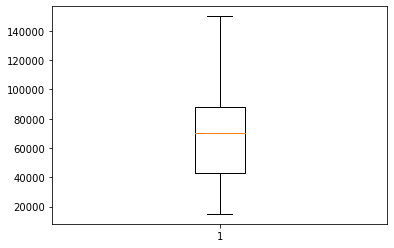

In [32]:
## No null values are avilable so considering the outliers if any in data
plt.boxplot(df['EstimatedSalary'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x22f599dcaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x22f599eb130>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f599dc790>],
 'medians': [<matplotlib.lines.Line2D at 0x22f599eb7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f599ebb50>],
 'means': []}

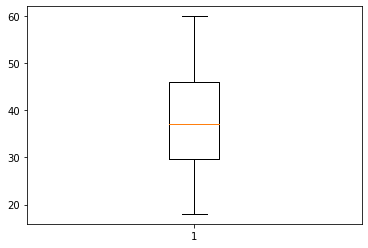

In [33]:
## No null values are avilable so considering the outliers if any in data
plt.boxplot(df['Age'].values)

In [34]:
# As the data is perfect proceeding with splitting the dataset

**Splitting the dataset into the Training set and Test set**

In [35]:
X = df[['Gender_Male','Gender_Female','Age','EstimatedSalary']].values
y = df[['Purchased']].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Feature Scaling**

In [37]:
scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

**Fitting K-NN to the Training set**

In [38]:
ml_model= KNeighborsClassifier()
ml_model.fit(X_train_scaled,y_train) 
y_pred=ml_model.predict(X_test_scaled)
y_pred

<ipython-input-38-8edd65c9a879>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ml_model.fit(X_train_scaled,y_train)


array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

**Predicting the Test set results**

In [41]:
ml_model.predict(X_test_scaled)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

**Making the Confusion Matrix**

In [42]:
y_Test_predictions = ml_model.predict(X_test_scaled)
y_Test_predictions

cnf_matrix = confusion_matrix(y_test, ml_model.predict(X_test_scaled))
print(cnf_matrix)
print(accuracy_score(y_test, ml_model.predict(X_test_scaled)))

[[44  4]
 [ 3 29]]
0.9125


In [43]:
print(accuracy_score(y_test, y_pred))

0.9125


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.88      0.91      0.89        32

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



**Visualising the Training set results**

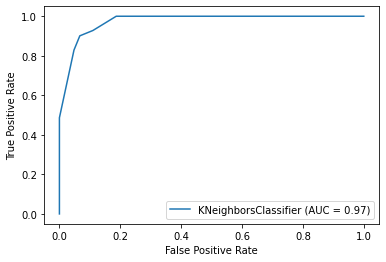

In [49]:
plot_roc_curve(ml_model, X_train_scaled, y_train)

**Visualising the Test set results**

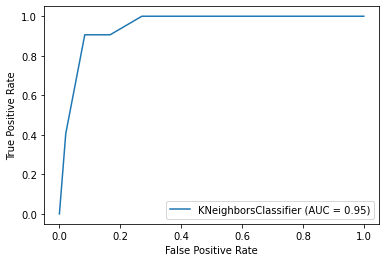

In [48]:
plot_roc_curve(ml_model, X_test_scaled, y_test)

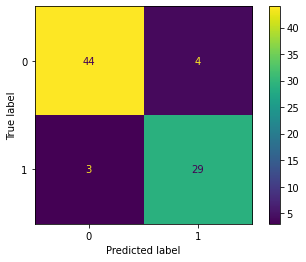

In [51]:
cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=ml_model.classes_).plot()